In [1]:
import numpy as np

from nltk import word_tokenize, sent_tokenize
import nltk
from collections import Counter
stop_words = nltk.corpus.stopwords.words('english')

from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tromso_description = """Tromsø is a beautiful city between FJORDS, ISLANDS AND MOUNTAINS, with a visible past, a fascinating history, a lively, colourful city centre, an inclusive nightlife and numerous attractions. Use the city as a base to foray into Arctic wilderness chasing Midnight Sun and Northern Lights. 01. 02."""
oslo_description = """Oslo is considered as a global city and is the major Norwegian hub for trading, shipping and banking. Location of Oslo: OSLO IS POSITIONED AT THE NORTHERNMOST END OF THE OSLOFJORD and occupies around 40 big and small islands within its limits. The climate of the region is temperate, humid."""
mining_course_description = """The aim of the course is to introduce the students to the concepts and techniques of natural languages processing and analysis, unstructured information analysis and management for better decision- making by deriving valuable insights from enterprise content regardless of source or format. The course provides deep and rich knowledge of text analysis techniques and applications including sentiment analysis and opinion mining, information access and text mining, document classification, topic extraction and other techniques and applications using real-world data and cases."""

In [3]:
def prepText(text, tokenName):
    tokenName = word_tokenize(text)
    tokenName = [token.lower() for token in tokenName]
    tokenName = [token.strip() for token in tokenName]
    tokenName = [word for word in tokenName if word not in stop_words]
    tokenName = [word for word in tokenName if word.isalnum()]
    return tokenName


In [4]:
token_tromso = prepText(tromso_description, 'token_tromso')
token_oslo = prepText(oslo_description, 'token_oslo')
token_nlp =  prepText(mining_course_description, 'token_nlp')


print(token_tromso[:10])
print(token_oslo[:10])
print(token_nlp[:10])


['tromsø', 'beautiful', 'city', 'fjords', 'islands', 'mountains', 'visible', 'past', 'fascinating', 'history']
['oslo', 'considered', 'global', 'city', 'major', 'norwegian', 'hub', 'trading', 'shipping', 'banking']
['aim', 'course', 'introduce', 'students', 'concepts', 'techniques', 'natural', 'languages', 'processing', 'analysis']


In [5]:
url = "https://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(raw[:200])

token_CP = prepText(raw, 'token_CP')
print(token_CP[:10])

The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with a
['project', 'gutenberg', 'ebook', 'crime', 'punishment', 'fyodor', 'dostoevsky', 'ebook', 'use', 'anyone']


In [14]:
wordCount = Counter(token_tromso).most_common(10)
print(wordCount)

[('city', 3), ('tromsø', 1), ('beautiful', 1), ('fjords', 1), ('islands', 1), ('mountains', 1), ('visible', 1), ('past', 1), ('fascinating', 1), ('history', 1)]


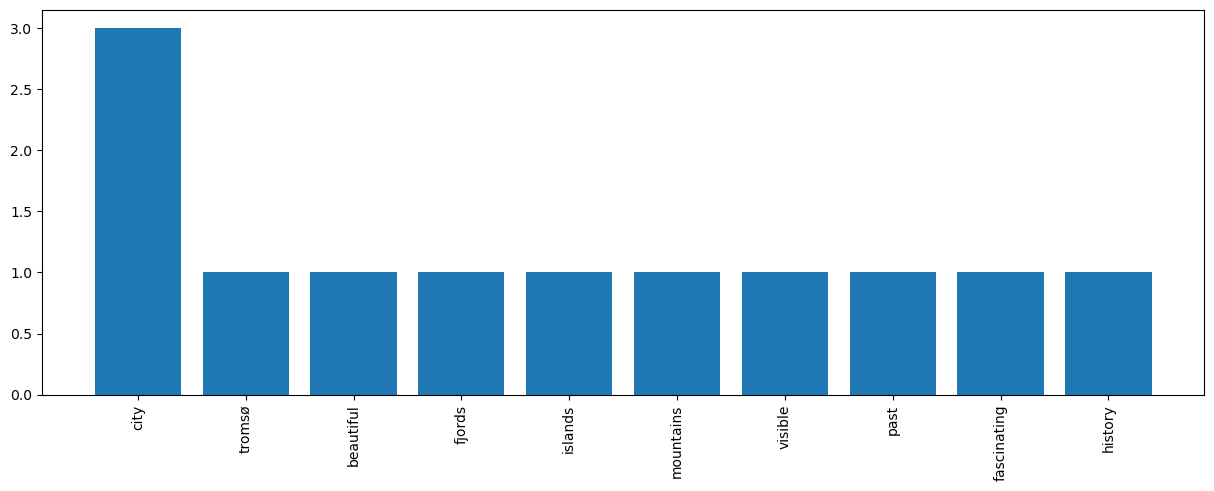

In [15]:
# visualise the word count
plt.figure(figsize=(15, 5))
plt.bar(*zip(*wordCount))
plt.xticks(rotation=90)
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

def buildBow(corpus: list):
    vectorizer = CountVectorizer()
    bow_representations = vectorizer.fit_transform([" ".join(description) for description in corpus])
    feature_names = vectorizer.get_feature_names_out()
    bow_matrix = bow_representations.toarray()
    return bow_matrix, feature_names


In [134]:
bow_tromso, feature_tromso = buildBow([token_tromso])
bow_oslo, feature_oslo = buildBow([token_oslo])
bow_nlp, feature_nlp = buildBow([token_nlp])
bow_CP, feature_CP = buildBow([token_CP])

# Display the BoW representations
print("BoW Representations:")
print(bow_tromso[:, :20])
print(bow_oslo[:, :20])
print(bow_nlp[:, :20])
print(bow_CP[:, :20])

# Display the feature names
print("Feature Names (Words):")
print(feature_tromso[:20])
print(feature_oslo[:20])
print(feature_nlp[:20])
print(feature_CP[:20])


BoW Representations:
[[1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1]]
[[1 1 4 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1]]
[[1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2]]
Feature Names (Words):
['01' '02' 'arctic' 'attractions' 'base' 'beautiful' 'centre' 'chasing'
 'city' 'colourful' 'fascinating' 'fjords' 'foray' 'history' 'inclusive'
 'islands' 'lights' 'lively' 'midnight' 'mountains']
['40' 'around' 'banking' 'big' 'city' 'climate' 'considered' 'end'
 'global' 'hub' 'humid' 'islands' 'limits' 'location' 'major'
 'northernmost' 'norwegian' 'occupies' 'oslo' 'oslofjord']
['access' 'aim' 'analysis' 'applications' 'better' 'cases'
 'classification' 'concepts' 'content' 'course' 'data' 'deep' 'deriving'
 'document' 'enterprise' 'extraction' 'format' 'including' 'information'
 'insights']
['14' '1500' '1849' '1859' '1861' '1864' '1880' '20' '2001' '2021' '2554'
 '30' '47' '50' '501' '60' '801' '809' '84116' '90']
